# PyBEL Demo

**Author:** [Charles Tapley Hoyt](https://github.com/cthoyt/)

This demo shows the ease of downloading a sample BEL file by URL and parsing it with `PyBEL`. 

In [1]:
import os, logging, time, math, shutil
from collections import Counter

import pybel
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
pybel.get_version()

'PyBEL Version: 0.2.5'

In [3]:
time.asctime()

'Tue Nov 15 18:06:43 2016'

In [4]:
#logging.basicConfig(level=logging.INFO)
#logging.getLogger("requests").setLevel(logging.WARNING)

In [5]:
bel_path = os.path.expanduser('~/.pybel/bel/')
if not os.path.exists(bel_path):
    os.makedirs(bel_path)

## Data Acquisition

In these examples, `pybel` downloads the small and large corpra from the Selventa examples posted on the [BELFramework Resources Site](http://resource.belframework.org/belframework/1.0/knowledge). 

### Selventa Small Corpus

The [Selventa Example Small Corpus](http://resource.belframework.org/belframework/1.0/knowledge/small_corpus.bel) is distributed by OpenBEL and consists of approximately 2000 hand curated statements drawn from 57 PubMeds.

In [6]:
%%time
small_corpus_url = 'http://resource.belframework.org/belframework/1.0/knowledge/small_corpus.bel'
g = pybel.from_url(small_corpus_url)

CPU times: user 25.2 s, sys: 1.86 s, total: 27.1 s
Wall time: 27.7 s


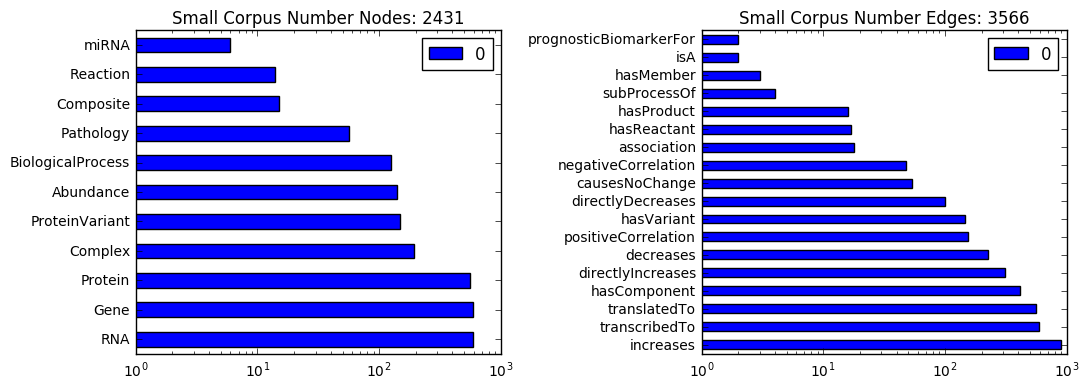

In [7]:
df = pd.DataFrame.from_dict(Counter(node[0] for node in g), orient='index')
ec = Counter(data[2]['relation'] for data in g.edges(data=True))
df_ec = pd.DataFrame.from_dict(ec, orient='index')

fig, axes = plt.subplots(1, 2, figsize=(11, 4))

df.sort_values(0, ascending=False).plot(kind='barh', logx=True, ax=axes[0])
axes[0].set_title('Small Corpus Number Nodes: {}'.format(g.number_of_nodes()))

df_ec.sort_values(0, ascending=False).plot(kind='barh', logx=True, ax=axes[1])
axes[1].set_title('Small Corpus Number Edges: {}'.format(g.number_of_edges()))

plt.tight_layout()
plt.show()

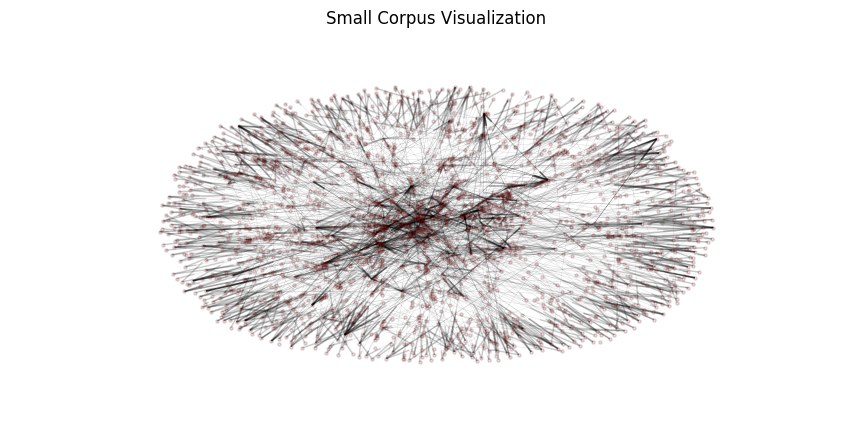

In [8]:
plt.figure(figsize=(10, 5))
plt.title('Small Corpus Visualization')
nx.draw_spring(g, 
               k=4/math.sqrt(len(g)),
               iterations=1000,
               node_size=5, 
               width=0.3,  
               alpha=0.15)

plt.show()

### Selventa Large Corpus

The [Selventa Large Corpus](http://resource.belframework.org/belframework/1.0/knowledge/large_corpus.bel) is a subset of the Selventa Knowledgebase and containts approximately 61,000 statements. This corpus was used in the publication of the [reverse causal reasoning](https://bmcbioinformatics.biomedcentral.com/articles/10.1186/1471-2105-14-340) algorithm.

In [9]:
%%time
large_corpus_url = 'http://resource.belframework.org/belframework/1.0/knowledge/large_corpus.bel'
g_large = pybel.from_url(large_corpus_url)

CPU times: user 6min 26s, sys: 3.42 s, total: 6min 29s
Wall time: 6min 34s


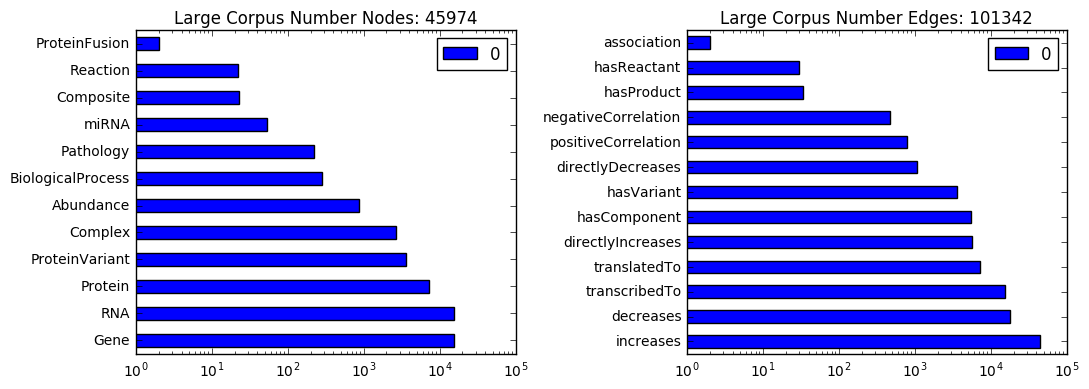

In [10]:
df = pd.DataFrame.from_dict(Counter(node[0] for node in g_large), orient='index')
ec = Counter(data[2]['relation'] for data in g_large.edges(data=True))
df_ec = pd.DataFrame.from_dict(ec, orient='index')

fig, axes = plt.subplots(1, 2, figsize=(11, 4))

df.sort_values(0, ascending=False).plot(kind='barh', logx=True, ax=axes[0])
axes[0].set_title('Large Corpus Number Nodes: {}'.format(g_large.number_of_nodes()))

df_ec.sort_values(0, ascending=False).plot(kind='barh', logx=True, ax=axes[1])
axes[1].set_title('Large Corpus Number Edges: {}'.format(g_large.number_of_edges()))

plt.tight_layout()
plt.show()

## Filtering Data

In addition to all of the wonderful ways one can interact with a `networkx` graph ([see tutorial](http://networkx.readthedocs.io/en/networkx-1.11/tutorial/tutorial.html)), `pybel` exposes the nodes and edges with simple filtering mechanisms. 

### Filtering Nodes by Data

Each node has a data dictionary attached to it. By default, this contains information about what type of entitity it is, what namespace and name it has, and other information.

In [11]:
# Get all nodes from HGNC

human_genes = list(g.nodes_iter(type="Gene", namespace='HGNC'))

human_genes[:10]

[('Gene', 'HGNC', 'LAMTOR3'),
 ('Gene', 'HGNC', 'KRAS'),
 ('Gene', 'HGNC', 'CXCR4'),
 ('Gene', 'HGNC', 'TGFA'),
 ('Gene', 'HGNC', 'STAT5A'),
 ('Gene', 'HGNC', 'EGLN2'),
 ('Gene', 'HGNC', 'ITGB3'),
 ('Gene', 'HGNC', 'CALM1'),
 ('Gene', 'HGNC', 'CUL2'),
 ('Gene', 'HGNC', 'AXIN2')]

If a sequence is given as the value, then it can match any of the options.

In [12]:
human_and_rat_genes = list(g.nodes_iter(type="Gene", namespace={'HGNC', 'MGI'}))
human_and_rat_genes[:10]

[('Gene', 'HGNC', 'LAMTOR3'),
 ('Gene', 'HGNC', 'KRAS'),
 ('Gene', 'HGNC', 'CXCR4'),
 ('Gene', 'HGNC', 'TGFA'),
 ('Gene', 'HGNC', 'STAT5A'),
 ('Gene', 'HGNC', 'EGLN2'),
 ('Gene', 'HGNC', 'ITGB3'),
 ('Gene', 'HGNC', 'CALM1'),
 ('Gene', 'HGNC', 'CUL2'),
 ('Gene', 'HGNC', 'AXIN2')]

### Filtering Edges by Data

Like the nodes, edges also have data associated to them. This can allow for filtering of edges by relation

In [13]:
increases_edges = list(g.edges_iter(relation='increases'))

increases_edges[:10]

[(('Abundance', 'CHEBI', 'progesterone'), ('RNA', 'HGNC', 'CDKN1A')),
 (('Protein', 'PFM', 'Wnt Family'),
  ('BiologicalProcess', 'GO', 'lung smooth muscle development')),
 (('Protein', 'PFM', 'Wnt Family'), ('RNA', 'MGI', 'Myc')),
 (('Protein', 'PFM', 'Wnt Family'),
  ('BiologicalProcess', 'GO', 'lung pattern specification process')),
 (('Protein', 'PFM', 'Wnt Family'),
  ('BiologicalProcess', 'GO', 'cell proliferation')),
 (('Protein', 'PFM', 'Wnt Family'),
  ('BiologicalProcess', 'GO', 'lung epithelium development')),
 (('BiologicalProcess', 'GO', 'response to hypoxia'),
  ('Protein', 'HGNC', 'TH')),
 (('BiologicalProcess', 'GO', 'response to hypoxia'),
  ('RNA', 'HGNC', 'VEGFA')),
 (('BiologicalProcess', 'GO', 'response to hypoxia'),
  ('RNA', 'HGNC', 'VEGFA')),
 (('BiologicalProcess', 'GO', 'response to hypoxia'),
  ('Protein', 'HGNC', 'SLC2A1'))]

If a dictionary is given as the argument, then it matches that subdictionary.

In [14]:
edge_subject_kinase = list(g.edges_iter(subject={
    'effect': {'MolecularActivity': 'KinaseActivity'},
    'modifier': 'Activity'
}))
                           
edge_subject_kinase[:10]

[(('Protein', 'PFR', 'MAPK Erk1/3 Family'),
  ('BiologicalProcess', 'GO', 'skeletal muscle hypertrophy')),
 (('Protein', 'MGI', 'Akt1'),
  ('ProteinVariant',
   'MGI',
   'Foxo1',
   ('ProteinModification', 'Ph', 'Thr', 24))),
 (('Protein', 'MGI', 'Akt1'),
  ('ProteinVariant',
   'MGI',
   'Foxo1',
   ('ProteinModification', 'Ph', 'Thr', 24))),
 (('Protein', 'MGI', 'Akt1'),
  ('ProteinVariant',
   'MGI',
   'Foxo3',
   ('ProteinModification', 'Ph', 'Thr', 32))),
 (('Protein', 'MGI', 'Akt1'),
  ('ProteinVariant',
   'MGI',
   'Foxo3',
   ('ProteinModification', 'Ph', 'Thr', 32))),
 (('Protein', 'MGI', 'Akt1'),
  ('ProteinVariant',
   'MGI',
   'Tsc2',
   ('ProteinModification', 'Ph', 'Thr', 1462))),
 (('Protein', 'MGI', 'Akt1'),
  ('ProteinVariant',
   'MGI',
   'Tsc2',
   ('ProteinModification', 'Ph', 'Ser', 939))),
 (('Protein', 'MGI', 'Akt1'), ('RNA', 'MGI', 'Cdkn1b')),
 (('Protein', 'MGI', 'Akt1'), ('Protein', 'PFM', 'Foxo Family')),
 (('Protein', 'MGI', 'Kdr'), ('BiologicalProcess'

# Conclusions

`pybel` allows for easy and fast loading of data from a variety of sources. Additionally, the shown method of filtering can become incredibly useful, especially when overlaying other data, such as differential gene expression labels (up, down, unregulated).